In [2]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import seaborn as sns

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Data of Gender is converted into Binary Data
df_one = pd.get_dummies(df["Attrition"])
df_one

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
1465,1,0
1466,1,0
1467,1,0
1468,1,0


In [6]:
# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, df), axis=1)
 
 
# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)
df_Att = df_two.rename({"Yes":"Attrition_status"}, axis =1)

# Drop columns that are not useful
df_Att.drop(["EmployeeCount"], axis=1, inplace = True)
df_Att.drop(["Over18"], axis=1, inplace = True)
df_Att.drop(["StandardHours"], axis=1, inplace = True)
df_Att

,Attrition_status,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,...,3,4,0,17,3,2,9,6,0,8


In [7]:
df_Att.drop(["EmployeeNumber"], axis=1, inplace = True)

In [8]:
df_Att

,Attrition_status,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,0,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,...,3,4,0,17,3,2,9,6,0,8


In [9]:
corr_matrix = df_Att.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
# Decending order 
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation


In [10]:
corrdf = sol.to_frame()
corrdf.rename(columns = {0:'Corr_coefficient'}, inplace = True)
corrdf.sort_values(by = "Corr_coefficient", ascending = False)

Corr_coefficient
JobLevel                 MonthlyIncome                 0.950300
                         TotalWorkingYears             0.782208
PercentSalaryHike        PerformanceRating             0.773550
MonthlyIncome            TotalWorkingYears             0.772893
YearsAtCompany           YearsWithCurrManager          0.769212
...                                                         ...
EnvironmentSatisfaction  JobLevel                      0.001212
TotalWorkingYears        WorkLifeBalance               0.001008
RelationshipSatisfaction YearsWithCurrManager          0.000867
JobSatisfaction          MonthlyRate                   0.000644
DailyRate                PerformanceRating             0.000473

[276 rows x 1 columns]

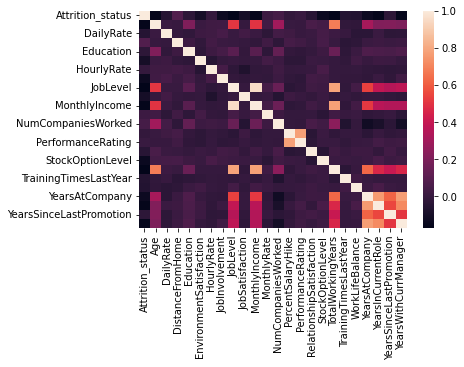

In [11]:

import matplotlib.pyplot as plt
sns.heatmap(df_Att.corr())

plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [12]:
df_Att.drop(["JobLevel"], axis=1, inplace = True)
df_Att.drop(["Attrition"], axis=1, inplace = True)
df_Att

,Attrition_status,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [13]:
def Under30 (row):
    if row['Age'] < 30 :
        return "Under 30"
    else:
        return "Above 30"

In [14]:
df_Att["Below 30"] = df.apply(lambda row: Under30(row), axis=1)
df_Att

,Attrition_status,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Below 30
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,0,8,0,1,6,4,0,5,Above 30
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,1,10,3,3,10,7,1,7,Above 30
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,0,7,3,3,0,0,0,0,Above 30
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,0,8,3,3,8,7,3,0,Above 30
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,1,6,3,3,2,2,2,2,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,1,17,3,3,5,2,0,3,Above 30
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,1,9,5,3,7,7,1,7,Above 30
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,1,6,0,3,6,2,0,3,Under 30
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,0,17,3,2,9,6,0,8,Above 30


In [15]:
#define samples
group1 = df_Att[df_Att['Below 30']=='Under 30']
group2 = df_Att[df_Att['Below 30']=='Above 30']

#perform independent two sample t-test
ttest_ind(group1['Education'], group2['Education'])

Ttest_indResult(statistic=-10.184169019708971, pvalue=1.3892167625749712e-23)

In [16]:
from scipy import stats


from scipy.stats import t
def welch_ttest(x1, x2,alternative):
    
    n1 = x1.size
    n2 = x2.size
    m1 = np.mean(x1)
    m2 = np.mean(x2)
    
    v1 = np.var(x1, ddof=1)
    v2 = np.var(x2, ddof=1)
    
    pooled_se = np.sqrt(v1 / n1 + v2 / n2)
    delta = m1-m2
    
    tstat = delta /  pooled_se
    df = (v1 / n1 + v2 / n2)**2 / (v1**2 / (n1**2 * (n1 - 1)) + v2**2 / (n2**2 * (n2 - 1)))
    
    # two side t-test
    p = 2 * t.cdf(-abs(tstat), df)
    
    # upper and lower bounds
    lb = delta - t.ppf(0.975,df)*pooled_se 
    ub = delta + t.ppf(0.975,df)*pooled_se
  
    return pd.DataFrame(np.array([tstat,df,p,delta,lb,ub]).reshape(1,-1),
                         columns=['T statistic','df','pvalue 2 sided','Difference in mean','lb','ub'])


In [17]:
welch_ttest(group1['Education'],group2['Education'],"equal")

,T statistic,df,pvalue 2 sided,Difference in mean,lb,ub
0,-10.040857,514.148115,8.783503e-22,-0.633076,-0.756944,-0.509209


In [18]:
contigency= pd.crosstab(df_Att['Education'], df_Att['Attrition_status'])
contigency

Attrition_status,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5


In [19]:
contigency_pct = pd.crosstab(df_Att['Education'], df_Att['Attrition_status'], normalize='index')
contigency_pct

Attrition_status,0,1
Education,,
1,0.817647,0.182353
2,0.843972,0.156028
3,0.826923,0.173077
4,0.854271,0.145729
5,0.895833,0.104167


<AxesSubplot:xlabel='Attrition_status', ylabel='Education'>

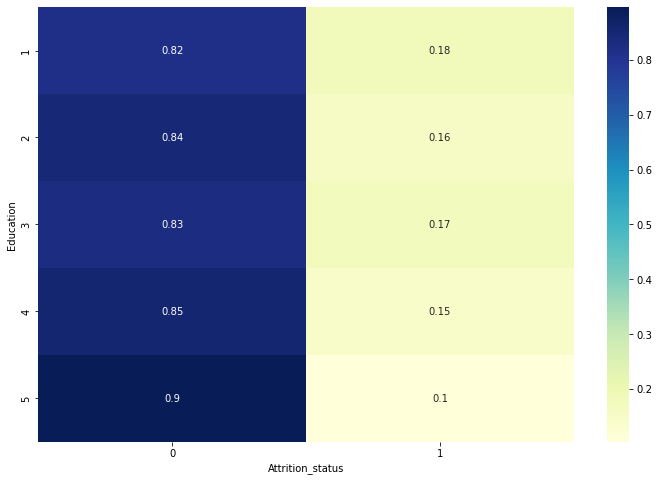

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")
#plt.savefig('Education_heatmap')

In [21]:
df_Att['bin_age'] = pd.qcut(df_Att['Age'], q=6, labels=[0,1,2,3,4,5])

<AxesSubplot:xlabel='Attrition_status', ylabel='bin_age'>

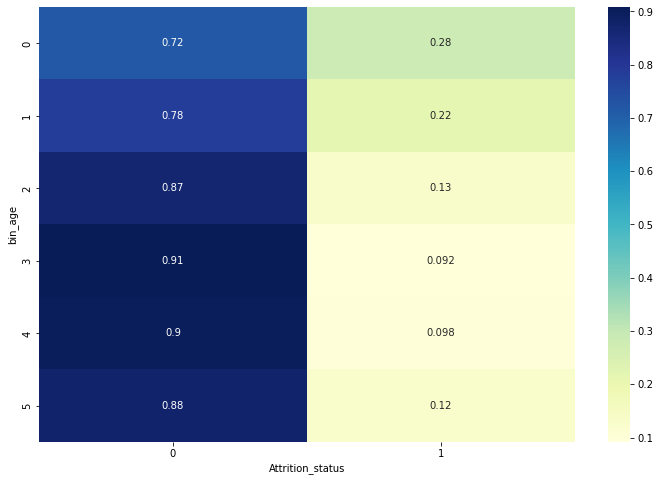

In [22]:
age_heat = pd.crosstab(df_Att['bin_age'], df_Att['Attrition_status'], normalize='index')
plt.figure(figsize=(12,8))
sns.heatmap(age_heat, annot=True, cmap="YlGnBu")
#plt.savefig('Age_heatmap')

In [23]:
df_Att["Age"].min()

18

In [24]:
Educationdf = pd.get_dummies(df_Att["Education"])

In [25]:
Below30df = pd.get_dummies(df_Att["Below 30"])

In [26]:
subedu30 = pd.concat([Educationdf, Below30df], axis=1)
subedu30


,1,2,3,4,5,Above 30,Under 30
0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,0
2,0,1,0,0,0,1,0
3,0,0,0,1,0,1,0
4,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1465,0,1,0,0,0,1,0
1466,1,0,0,0,0,1,0
1467,0,0,1,0,0,0,1
1468,0,0,1,0,0,1,0


In [27]:
subedu30["UCollegeUnder30"] = subedu30[1]*subedu30["Under 30"]
subedu30["CollegeUnder30"] = subedu30[2]*subedu30["Under 30"]
subedu30["BachelorUnder30"] = subedu30[3]*subedu30["Under 30"]
subedu30["MasterUnder30"] = subedu30[4]*subedu30["Under 30"]
subedu30["DoctorUnder30"] = subedu30[5]*subedu30["Under 30"]
subedu30

,1,2,3,4,5,Above 30,Under 30,UCollegeUnder30,CollegeUnder30,BachelorUnder30,MasterUnder30,DoctorUnder30
0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,0,0,1,0,0,0,0,0,0
1466,1,0,0,0,0,1,0,0,0,0,0,0
1467,0,0,1,0,0,0,1,0,0,1,0,0
1468,0,0,1,0,0,1,0,0,0,0,0,0


<AxesSubplot:>

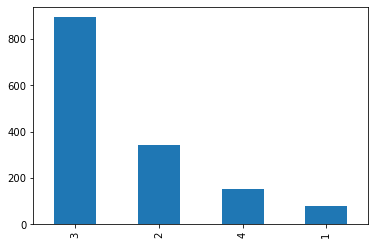

In [28]:
fig, ax = plt.subplots()
df_Att['WorkLifeBalance'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:title={'center':'Attrition Distribution'}>

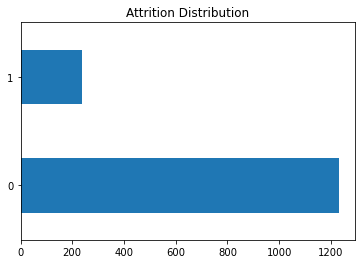

In [29]:

df_Att['Attrition_status'].value_counts().plot(kind='barh', title="Attrition Distribution")
#savefig("Attrition Distribution.jpg")

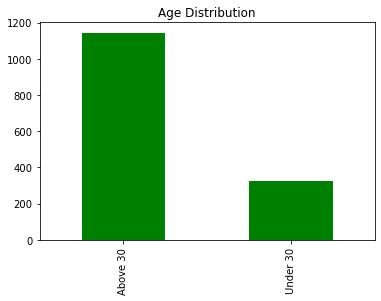

In [30]:
df_Att['Below 30'].value_counts().plot(kind='bar', title="Age Distribution", color = "green")
plt.show()
#plt.savefig("Age Distribution.jpg")

In [31]:
# There are 23 numerical columns in the data, and 6 categorical data. 
df_Att.describe()

,Attrition_status,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
# 1. build one linear bin and charts
# 2. Make a for loop
# use a stacked plot to include all the information. 

In [33]:
lineardf = pd.DataFrame()
lineardf["attrition"] = df_Att["Attrition_status"]
lineardf["age"] = df_Att["Age"]

In [34]:
lineardf["age"].max() - lineardf["age"].min()

42

In [35]:
lineardf['bin'] = pd.qcut(lineardf['age'], q=4, labels=[0,1,2,3])

In [36]:
import matplotlib.pyplot as plt

In [37]:
lineardf.sort_values(by = "age", ascending = False)

,attrition,age,bin
1209,0,60,3
427,0,60,3
536,0,60,3
411,0,60,3
879,0,60,3
...,...,...,...
972,0,18,0
457,1,18,0
828,1,18,0
1153,1,18,0


<AxesSubplot:xlabel='bin'>

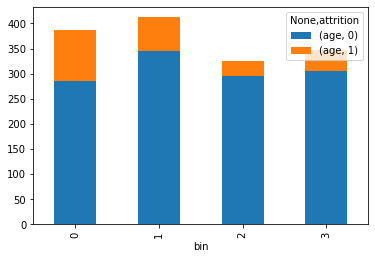

In [38]:
df_pivot = lineardf.groupby(['bin', 'attrition']).count().reset_index().pivot(columns=['attrition'], index='bin')
df_pivot.plot(kind='bar', stacked=True)

In [39]:
IndependOnlydf = df_Att.drop("Attrition_status", axis = 1)

In [40]:
#IndependOnlydf.columns
IndependOnlydf = IndependOnlydf.select_dtypes(include=np.number, exclude=None)

In [41]:
IndependOnlydf

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,4,5993,19479,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,5130,24907,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,3,2090,2396,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,3,2909,23159,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,2,3468,16632,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,4,2571,12290,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,1,9991,21457,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,6142,5174,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,5390,13243,...,3,4,0,17,3,2,9,6,0,8


In [42]:
from scipy.stats import ttest_ind

/Users/zhangziyue/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


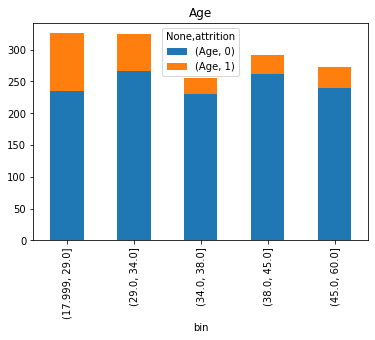

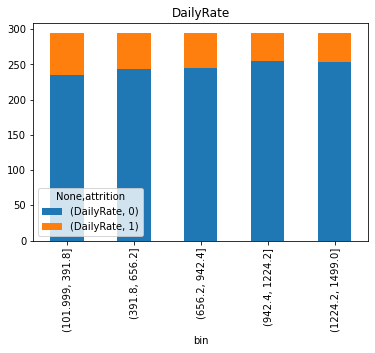

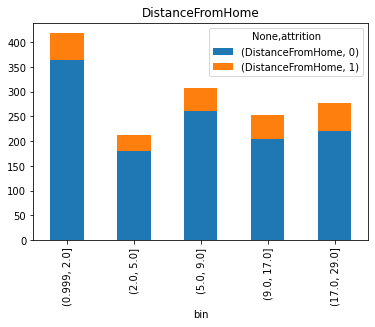

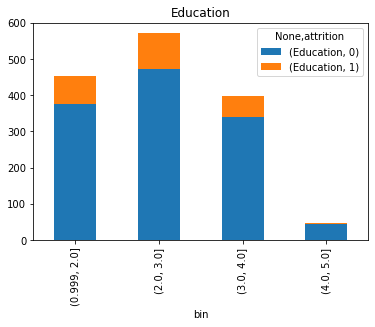

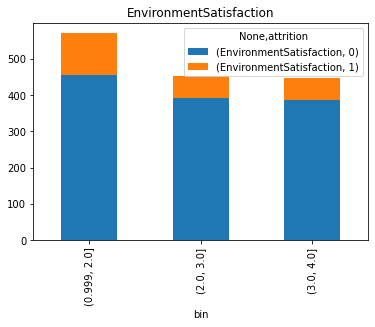

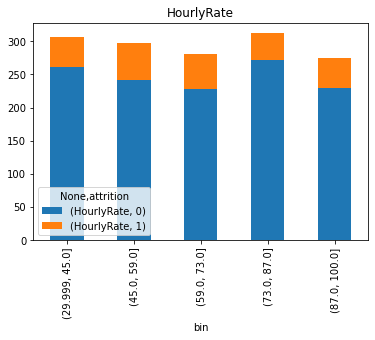

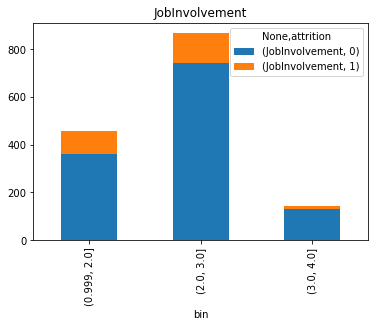

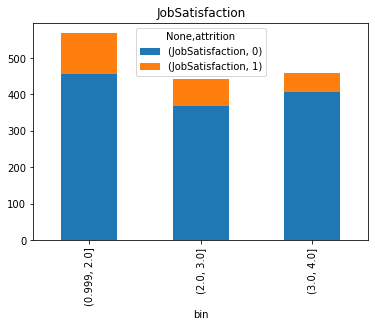

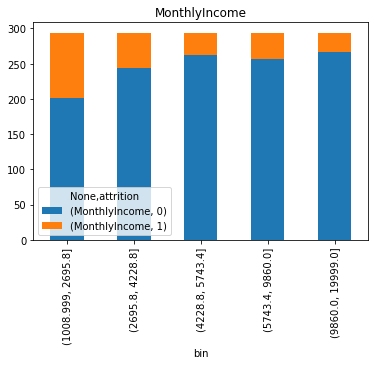

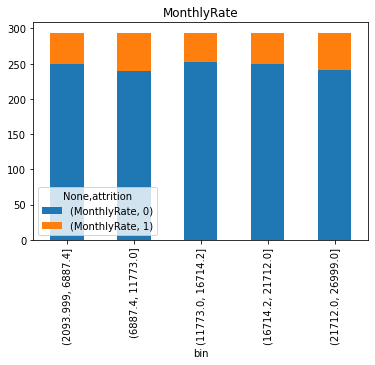

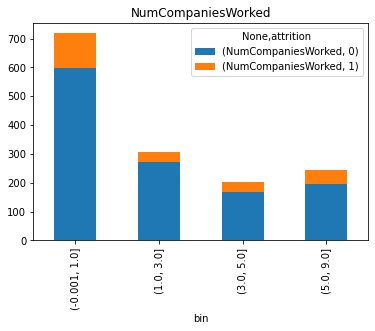

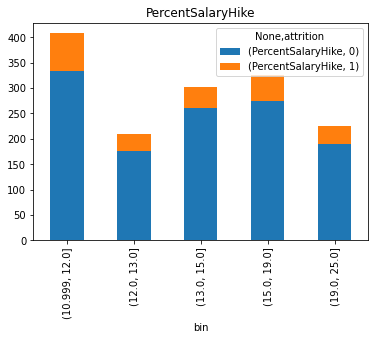

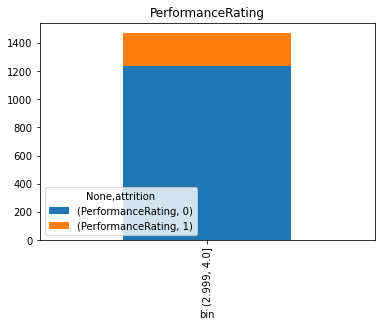

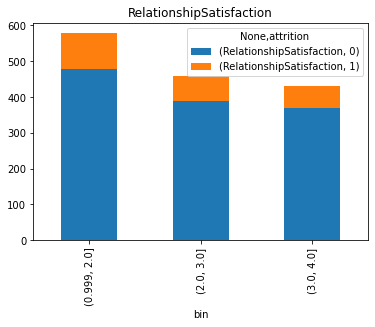

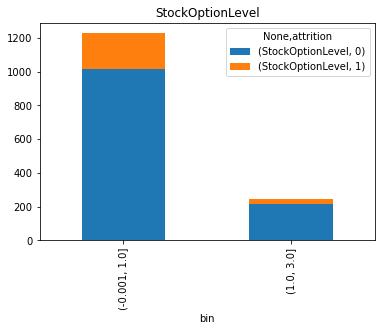

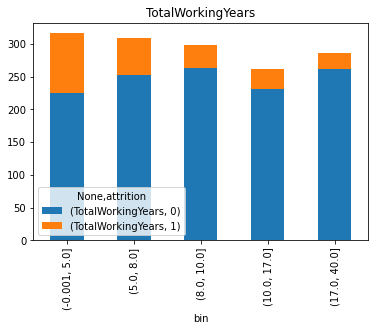

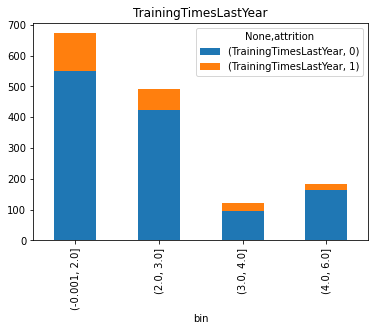

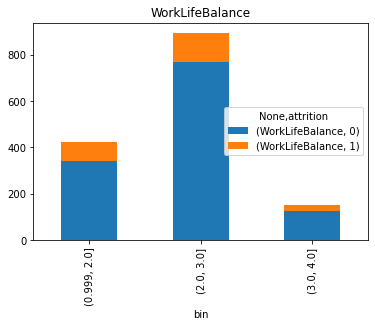

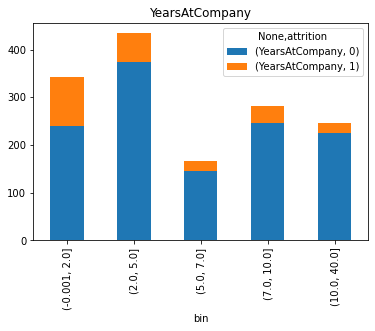

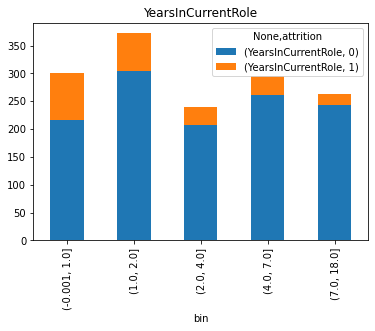

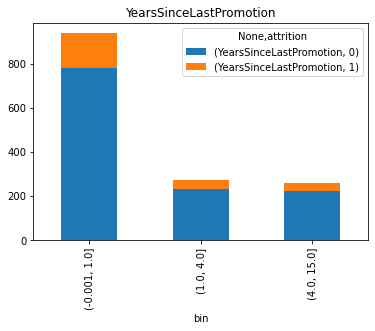

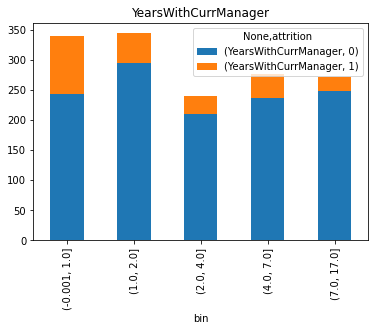

In [43]:
for col in IndependOnlydf.columns:
    newdf = pd.DataFrame()
    newdf["attrition"] = df_Att['Attrition_status']
    newdf[col] = IndependOnlydf[col]
    newdf['bin'] = pd.qcut(newdf[col], q=5, duplicates = "drop")
    df_pivot = newdf.groupby(['bin', 'attrition']).count().reset_index().pivot(columns=['attrition'], index='bin')
    df_pivot.plot(kind='bar', stacked=True, title= col)
    #plt.savefig(col + '.jpg')




In [44]:
import cv2

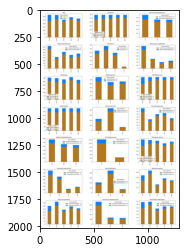

In [45]:
img = cv2.imread("Allplots.jpg")
# Displaying the image
plt.imshow(img)

In [46]:
df_Att

,Attrition_status,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Below 30,bin_age
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,Above 30,4
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,Above 30,5
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,Above 30,3
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,Above 30,2
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,Under 30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,1,17,3,3,5,2,0,3,Above 30,2
1466,0,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,9,5,3,7,7,1,7,Above 30,3
1467,0,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,1,6,0,3,6,2,0,3,Under 30,0
1468,0,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,0,17,3,2,9,6,0,8,Above 30,5


In [47]:
df_Att.columns

Index(['Attrition_status', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Below 30', 'bin_age'],
      dtype='object')

In [48]:

Linear =  ['Age', 
       'EnvironmentSatisfaction', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

Lineardf = df_Att.filter(Linear, axis=1)
Lineardf

,Age,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,94,4,5993,19479,8,1,0,8,0,6,4,0,5
1,49,3,61,2,5130,24907,1,4,1,10,3,10,7,1,7
2,37,4,92,3,2090,2396,6,2,0,7,3,0,0,0,0
3,33,4,56,3,2909,23159,1,3,0,8,3,8,7,3,0
4,27,1,40,2,3468,16632,9,4,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,41,4,2571,12290,4,3,1,17,3,5,2,0,3
1466,39,4,42,1,9991,21457,4,1,1,9,5,7,7,1,7
1467,27,2,87,2,6142,5174,1,2,1,6,0,6,2,0,3
1468,49,4,63,2,5390,13243,2,4,0,17,3,9,6,0,8


In [49]:
NonLinear = ['Education', 'NumCompaniesWorked', 'PerformanceRating', 
             'PercentSalaryHike', 'JobInvolvement', 'MonthlyIncome', 'WorkLifeBalance', 'MonthlyRate', 'HourlyRate',
            'EducationField', "BusinessTravel", "Department"]

In [50]:
Nonlineardf = df_Att.filter(NonLinear, axis=1)

In [51]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [52]:
# Assign vectors
X = Lineardf
y = df_Att["Attrition_status"].tolist()

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=11)

In [54]:
%%time
lr_binary = LogisticRegression(class_weight={0:.23, 1:.77}, random_state=11)
# class_weight = balanced used in the imbalance dataset. If not, it will generate a lot of 0s. 
lr_trained=lr_binary.fit(X_train, y_train)

# Predict y and show the result
y_results = lr_trained.predict(X_test)
score = lr_trained.score(X_test,y_test)
probs_binary = lr_binary.predict_proba(X_test)

CPU times: user 315 ms, sys: 90.5 ms, total: 406 ms
Wall time: 70.8 ms


/Users/zhangziyue/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print(score)

0.7482993197278912


In [56]:
len(Lineardf.columns)

15

In [57]:
from sklearn.metrics import precision_score
precision_score(y_test, y_results, average=None)

array([0.88304094, 0.28282828])

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test, y_results, average=None)

array([0.80965147, 0.41176471])

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, y_results, average=None)

array([0.84475524, 0.33532934])

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_results)
cm

array([[302,  71],
       [ 40,  28]])

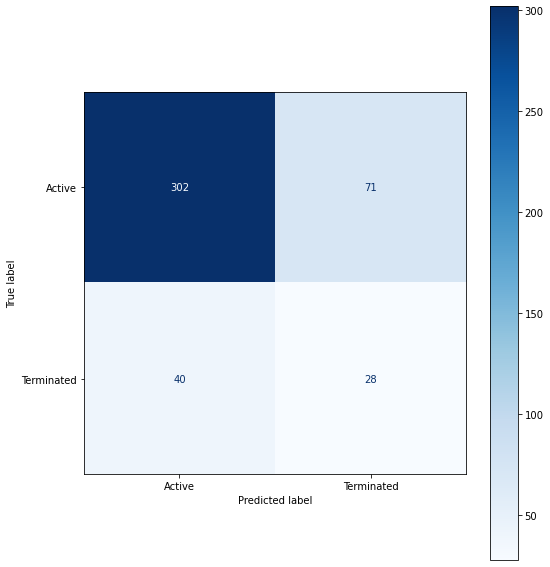

In [61]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(8, 8)) 
plot_confusion_matrix(lr_trained, X_test, y_test,  display_labels = ("Active","Terminated"),cmap='Blues', ax=ax)  
plt.tight_layout()
plt.savefig("Confusion Matrix Log.jpg",dpi=199)

In [62]:
Coefficient = lr_trained.coef_.tolist()[0]
Coefficient

[-0.015103537797400866,
 -0.045862399422953185,
 0.0053369488725720175,
 -0.06766326073797983,
 -6.814825652964656e-05,
 2.886037204096801e-05,
 0.16070234740847364,
 0.01065968614168249,
 -0.07497344381232313,
 -0.0446908599154258,
 -0.0223253667762035,
 0.020929356122522627,
 -0.06038635403643905,
 0.20671308373093888,
 -0.08421294907238577]

In [63]:
import math

In [64]:
LR = pd.DataFrame()
LR["Variable"] = Linear
LR["Coefficient"] = Coefficient
LR["Odds Ratio"] = math.e**(LR["Coefficient"])
LR = LR.sort_values(by = "Odds Ratio", ascending = False)
LR

,Variable,Coefficient,Odds Ratio
13,YearsSinceLastPromotion,0.206713,1.229630
6,NumCompaniesWorked,0.160702,1.174335
11,YearsAtCompany,0.020929,1.021150
7,RelationshipSatisfaction,0.010660,1.010717
2,HourlyRate,0.005337,1.005351
5,MonthlyRate,0.000029,1.000029
4,MonthlyIncome,-0.000068,0.999932
0,Age,-0.015104,0.985010
10,TrainingTimesLastYear,-0.022325,0.977922
9,TotalWorkingYears,-0.044691,0.956293


In [65]:
print(LR.to_latex(index=False, caption = "Logistic Regression Coefficient Table")) 

\begin{table}
\centering
\caption{Logistic Regression Coefficient Table}
\begin{tabular}{lrr}
\toprule
                Variable &  Coefficient &  Odds Ratio \\
\midrule
 YearsSinceLastPromotion &     0.206713 &    1.229630 \\
      NumCompaniesWorked &     0.160702 &    1.174335 \\
          YearsAtCompany &     0.020929 &    1.021150 \\
RelationshipSatisfaction &     0.010660 &    1.010717 \\
              HourlyRate &     0.005337 &    1.005351 \\
             MonthlyRate &     0.000029 &    1.000029 \\
           MonthlyIncome &    -0.000068 &    0.999932 \\
                     Age &    -0.015104 &    0.985010 \\
   TrainingTimesLastYear &    -0.022325 &    0.977922 \\
       TotalWorkingYears &    -0.044691 &    0.956293 \\
 EnvironmentSatisfaction &    -0.045862 &    0.955173 \\
      YearsInCurrentRole &    -0.060386 &    0.941401 \\
         JobSatisfaction &    -0.067663 &    0.934575 \\
        StockOptionLevel &    -0.074973 &    0.927768 \\
    YearsWithCurrManager &    -0.

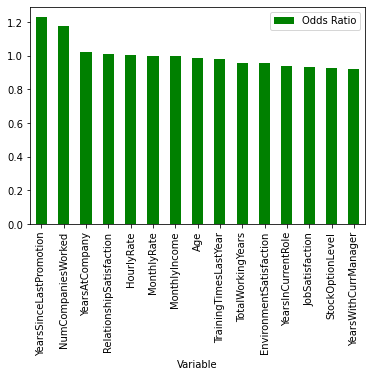

In [66]:
fig = LR.plot(x="Variable", y="Odds Ratio", kind="bar", color = "green")

#fig.figure.savefig("logistic odds ratio.png")

In [67]:
Nonlineardf.BusinessTravel.replace(to_replace=['Travel_Rarely', 'Travel_Frequently', "Non-Travel"], value=['1', '2', "0"], inplace = True)
Nonlineardf

,Education,NumCompaniesWorked,PerformanceRating,PercentSalaryHike,JobInvolvement,MonthlyIncome,WorkLifeBalance,MonthlyRate,HourlyRate,EducationField,BusinessTravel,Department
0,2,8,3,11,3,5993,1,19479,94,Life Sciences,1,Sales
1,1,1,4,23,2,5130,3,24907,61,Life Sciences,2,Research & Development
2,2,6,3,15,2,2090,3,2396,92,Other,1,Research & Development
3,4,1,3,11,3,2909,3,23159,56,Life Sciences,2,Research & Development
4,1,9,3,12,3,3468,3,16632,40,Medical,1,Research & Development
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,4,3,17,4,2571,3,12290,41,Medical,2,Research & Development
1466,1,4,3,15,2,9991,3,21457,42,Medical,1,Research & Development
1467,3,1,4,20,4,6142,3,5174,87,Life Sciences,1,Research & Development
1468,3,2,3,14,2,5390,2,13243,63,Medical,2,Sales


In [68]:
EFdummy = pd.get_dummies(Nonlineardf["EducationField"])
Depdummy = pd.get_dummies(Nonlineardf["Department"])

In [69]:
Nonlineardf = pd.concat([Nonlineardf, EFdummy, Depdummy], axis=1)
Nonlineardf


,Education,NumCompaniesWorked,PerformanceRating,PercentSalaryHike,JobInvolvement,MonthlyIncome,WorkLifeBalance,MonthlyRate,HourlyRate,EducationField,...,Department,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Research & Development,Sales
0,2,8,3,11,3,5993,1,19479,94,Life Sciences,...,Sales,0,1,0,0,0,0,0,0,1
1,1,1,4,23,2,5130,3,24907,61,Life Sciences,...,Research & Development,0,1,0,0,0,0,0,1,0
2,2,6,3,15,2,2090,3,2396,92,Other,...,Research & Development,0,0,0,0,1,0,0,1,0
3,4,1,3,11,3,2909,3,23159,56,Life Sciences,...,Research & Development,0,1,0,0,0,0,0,1,0
4,1,9,3,12,3,3468,3,16632,40,Medical,...,Research & Development,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,4,3,17,4,2571,3,12290,41,Medical,...,Research & Development,0,0,0,1,0,0,0,1,0
1466,1,4,3,15,2,9991,3,21457,42,Medical,...,Research & Development,0,0,0,1,0,0,0,1,0
1467,3,1,4,20,4,6142,3,5174,87,Life Sciences,...,Research & Development,0,1,0,0,0,0,0,1,0
1468,3,2,3,14,2,5390,2,13243,63,Medical,...,Sales,0,0,0,1,0,0,0,0,1


In [70]:
Nonlineardf.drop(['EducationField', 'Department'], axis=1, inplace = True)


In [71]:
Nonlineardf

,Education,NumCompaniesWorked,PerformanceRating,PercentSalaryHike,JobInvolvement,MonthlyIncome,WorkLifeBalance,MonthlyRate,HourlyRate,BusinessTravel,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Research & Development,Sales
0,2,8,3,11,3,5993,1,19479,94,1,0,1,0,0,0,0,0,0,1
1,1,1,4,23,2,5130,3,24907,61,2,0,1,0,0,0,0,0,1,0
2,2,6,3,15,2,2090,3,2396,92,1,0,0,0,0,1,0,0,1,0
3,4,1,3,11,3,2909,3,23159,56,2,0,1,0,0,0,0,0,1,0
4,1,9,3,12,3,3468,3,16632,40,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,4,3,17,4,2571,3,12290,41,2,0,0,0,1,0,0,0,1,0
1466,1,4,3,15,2,9991,3,21457,42,1,0,0,0,1,0,0,0,1,0
1467,3,1,4,20,4,6142,3,5174,87,1,0,1,0,0,0,0,0,1,0
1468,3,2,3,14,2,5390,2,13243,63,2,0,0,0,1,0,0,0,0,1


In [72]:
# Assign vectors
XKNN = Nonlineardf
yKNN = df_Att["Attrition_status"].tolist()

In [73]:
XKNN_train,XKNN_test,yKNN_train,yKNN_test = train_test_split(XKNN,yKNN,test_size=0.3, random_state = 11)

In [74]:
#Nonlineardf.to_excel("Test.xlsx")

In [75]:
%%time
# KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(weights = 'distance', n_neighbors=5)
knn_trained = knn.fit(XKNN_train, yKNN_train)
knn_predictions = knn_trained.predict(XKNN_test)

CPU times: user 97.3 ms, sys: 35.9 ms, total: 133 ms
Wall time: 81.4 ms


In [76]:
KNNscore = knn_trained.score(XKNN_test,yKNN_test)
print(KNNscore)

0.8299319727891157


In [77]:
len(Nonlineardf.columns)

19

In [78]:
print(len(yKNN_test),len(knn_predictions))

441 441


In [79]:
from sklearn.metrics import confusion_matrix
cmKNN = confusion_matrix(yKNN_test, knn_predictions)
cmKNN

array([[356,  17],
       [ 58,  10]])

In [80]:
from sklearn.metrics import ConfusionMatrixDisplay

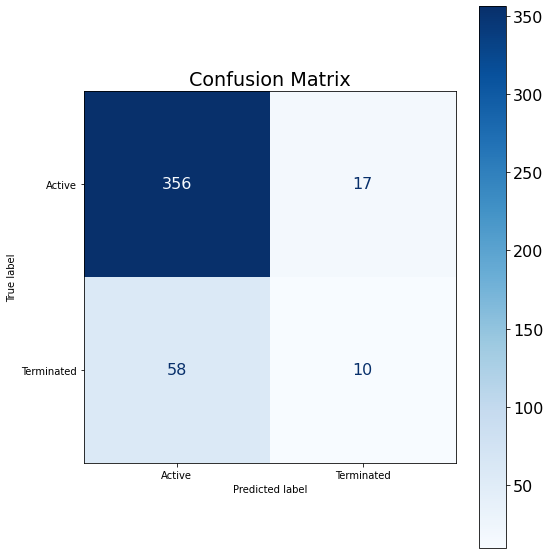

In [81]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(8, 8)) 
plt.rcParams.update({'font.size': 16})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plot_confusion_matrix(knn_trained, XKNN_test, yKNN_test, display_labels = ("Active","Terminated"), cmap='Blues', ax=ax)  
plt.tight_layout()
plt.savefig("Confusion Matrix KNN.jpg")

In [82]:
from sklearn.metrics import precision_score
precision_score(yKNN_test, knn_predictions)

0.37037037037037035

In [83]:
precision_score(yKNN_test, knn_predictions)

0.37037037037037035

In [84]:
# recall 
from sklearn.metrics import recall_score
recall_score(yKNN_test, knn_predictions, average=None)

array([0.95442359, 0.14705882])

In [85]:
recall_score(yKNN_test, knn_predictions)

0.14705882352941177

In [86]:
from sklearn.metrics import f1_score
f1_score(yKNN_test, knn_predictions, average=None)

array([0.9047014 , 0.21052632])

The f-1 score for the model is 0.897. 

In [87]:
Alldf = Lineardf.merge(Nonlineardf, how='left')
#Alldf["Attrition"] = df_Att["Attrition_status"]

In [88]:
Alldf

,Age,EnvironmentSatisfaction,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,...,BusinessTravel,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,Human Resources,Research & Development,Sales
0,41,2,94,4,5993,19479,8,1,0,8,...,1,0,1,0,0,0,0,0,0,1
1,49,3,61,2,5130,24907,1,4,1,10,...,2,0,1,0,0,0,0,0,1,0
2,37,4,92,3,2090,2396,6,2,0,7,...,1,0,0,0,0,1,0,0,1,0
3,33,4,56,3,2909,23159,1,3,0,8,...,2,0,1,0,0,0,0,0,1,0
4,27,1,40,2,3468,16632,9,4,1,6,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,3,41,4,2571,12290,4,3,1,17,...,2,0,0,0,1,0,0,0,1,0
1466,39,4,42,1,9991,21457,4,1,1,9,...,1,0,0,0,1,0,0,0,1,0
1467,27,2,87,2,6142,5174,1,2,1,6,...,1,0,1,0,0,0,0,0,1,0
1468,49,4,63,2,5390,13243,2,4,0,17,...,2,0,0,0,1,0,0,0,0,1


In [89]:
# Assign vectors
XAll = Alldf
yAll = df_Att["Attrition_status"].tolist()

In [90]:
X_trainAll,X_testAll,y_trainAll,y_testAll = train_test_split(XAll,yAll,test_size=0.3, random_state=11)

In [91]:
%%time

# SVM 

from sklearn import svm

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
svm_trained = clf.fit(X_trainAll, y_trainAll)
svm_predictions = svm_trained.predict(X_testAll)

CPU times: user 1min 29s, sys: 397 ms, total: 1min 29s
Wall time: 1min 30s


In [92]:
SVMscore = svm_trained.score(X_testAll,y_testAll)
print(SVMscore)

0.8639455782312925


In [93]:
clf.coef_

array([[-3.01616027e+00, -1.53491912e+01,  2.14261089e-01,
        -1.18360249e+01, -1.03179998e-02, -6.44052164e-03,
         1.15974711e+01, -2.94802957e+00, -2.02123680e+01,
        -4.75968934e+00, -1.03923912e+01,  4.55166782e+00,
        -9.79370909e-01,  1.27862254e+01, -6.55619135e+00,
         5.32192507e+00,  3.13863340e+00, -2.09344927e+00,
        -2.50739400e+01, -5.25791867e+00,  2.70870198e+01,
         2.00000000e+00, -3.98308850e+00,  6.00000000e+00,
        -8.59659675e+00, -2.00000000e+00,  6.57968525e+00,
         2.12757603e+00, -1.27553582e+01,  1.06277821e+01]])

In [95]:
SVMCoef = pd.DataFrame()
SVMCoef["Variables"] = Alldf.columns
SVMCoef["Coefficient"] = clf.coef_[0]
SVM1 = SVMCoef.sort_values(by = "Coefficient").iloc[0:3].reset_index()
SVM2 = SVMCoef.sort_values(by = "Coefficient").tail(3).reset_index()
SVMCoef = SVM1.join(SVM2, lsuffix='_LessLikly', rsuffix='_MoreLikly').drop(["index_LessLikly","index_MoreLikly"], axis = 1)
with pd.option_context("max_colwidth", 1000):
    print(SVMCoef.to_latex(index=False, caption='SVM Coefficients Table'))

\begin{table}
\centering
\caption{SVM Coefficients Table}
\begin{tabular}{lrlr}
\toprule
    Variables\_LessLikly &  Coefficient\_LessLikly &     Variables\_MoreLikly &  Coefficient\_MoreLikly \\
\midrule
         JobInvolvement &             -25.073940 &      NumCompaniesWorked &              11.597471 \\
       StockOptionLevel &             -20.212368 & YearsSinceLastPromotion &              12.786225 \\
EnvironmentSatisfaction &             -15.349191 &          BusinessTravel &              27.087020 \\
\bottomrule
\end{tabular}
\end{table}



In [96]:
svm_predictions = svm_trained.predict(X_testAll)

In [97]:
cmsvm = confusion_matrix(y_testAll, svm_predictions)
cmsvm

array([[368,   5],
       [ 55,  13]])

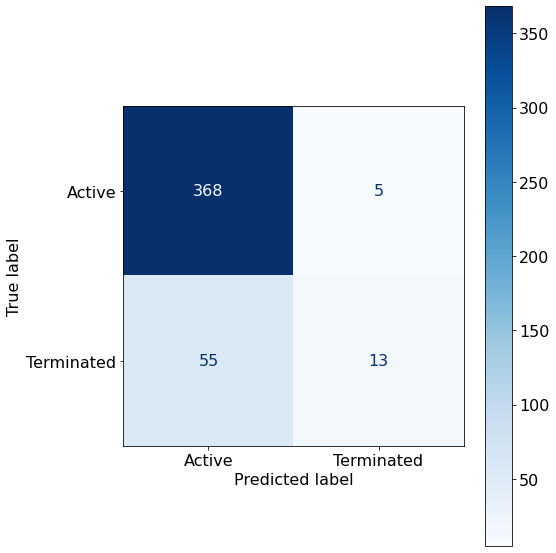

In [98]:
fig, ax = plt.subplots(figsize=(8, 8)) 
#class_names = ("Stay", "Leave")
plot_confusion_matrix(svm_trained, X_testAll, y_testAll,  display_labels = ("Active","Terminated"),cmap='Blues', ax=ax)  
plt.tight_layout()
plt.savefig("Confusion Matrix SVM.jpg")

In [99]:
print(precision_score(y_testAll, svm_predictions, average=None))
print(recall_score(y_testAll, svm_predictions, average=None))
print(f1_score(y_testAll, svm_predictions, average=None))

[0.86997636 0.72222222]
[0.98659517 0.19117647]
[0.92462312 0.30232558]


In [100]:
#Summarytable = pd.DataFrame()
summarytable = pd.read_excel("Book3.xlsx")
summarytable = summarytable[1:4]
print(summarytable.to_latex(index = False, caption='Summary Table'))

\begin{table}
\centering
\caption{Summary Table}
\begin{tabular}{lrllllll}
\toprule
             Models &  Accuracy  & Precision  & Unnamed: 3 &  Recall & Unnamed: 5 & F-1 Score & Unnamed: 7 \\
\midrule
Logistic Regression &     0.7483 &      0.883 &     0.2828 &  0.9096 &     0.4118 &    0.8448 &     0.3353 \\
                KNN &     0.8299 &     0.8599 &     0.3703 &  0.9544 &      0.147 &    0.9047 &     0.2105 \\
                SVM &     0.8639 &      0.868 &     0.7222 &  0.9865 &     0.1912 &    0.9246 &     0.3023 \\
\bottomrule
\end{tabular}
\end{table}

